This notebook is desined for tabular classification tasks with pandas and scikit-learn.
It is a simple example of how to use pandas and scikit-learn to build a classification model using a tabular dataset. The code includes data preprocessing, model training, and evaluation steps.
The dataset used in this example is the bank marketing dataset from the UCI Machine Learning Repository. The dataset contains information about a bank's marketing campaign and whether or not a customer subscribed to a term deposit.
The goal is to predict whether a customer will subscribe to a term deposit based on their demographic and behavioral features.


In [1]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib



In [2]:
data=pd.read_csv('/home/tisinr/MEGA/Dev/models/classifier/dataset/bank.csv',header=0, sep=';')
# Display the first few rows of the dataset
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
def rename_n_change(data):
    # Rename columns for better readability
    data.rename(columns={
        'marital':'marital_status',
        'default':'credit_default',
        'housing':'housing_loan',
        'loan':'personal_loan',
        'y':'target'}, inplace=True)
    #change data types
    data['target'] = data['target'].astype('category')
    data['marital_status'] = data['marital_status'].astype('category')
    data['education'] = data['education'].astype('category')
    data['job'] = data['job'].astype('category')
    data['contact'] = data['contact'].astype('category')
    data['month'] = data['month'].astype('category')
    data['day'] = data['day'].astype('category')
    data['credit_default'] = data['credit_default'].astype('category')
    data['housing_loan'] = data['housing_loan'].astype('category')
    data['personal_loan'] = data['personal_loan'].astype('category')
    return data
data=rename_n_change(data)

In [4]:
data['poutcome'].value_counts(dropna=False)

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [5]:
data.head()

,age,job,marital_status,education,credit_default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.isnull().sum()

age               0
job               0
marital_status    0
education         0
credit_default    0
balance           0
housing_loan      0
personal_loan     0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
target            0
dtype: int64

In [7]:
data['contact'].value_counts()/len(data)*100

contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: count, dtype: float64

In [8]:
def na_n_fill(data):
    # Replace 'unknown' in 'contact' column with 'undefined'
    data['contact'] = data['contact'].replace('unknown', 'undefine')
    data['job'].fillna(data['job'].mode()[0], inplace=True)
    data['education'].fillna(data['education'].mode()[0], inplace=True)
    data.drop('poutcome', axis=1, inplace=True)
    return data

data = na_n_fill(data)


<positron-console-cell-8>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
<positron-console-cell-8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior

In [9]:
data.head

<bound method NDFrame.head of        age           job marital_status  education credit_default  balance  \
0       58    management        married   tertiary             no     2143   
1       44    technician         single  secondary             no       29   
2       33  entrepreneur        married  secondary             no        2   
3       47   blue-collar        married    unknown             no     1506   
4       33       unknown         single    unknown             no        1   
...    ...           ...            ...        ...            ...      ...   
45206   51    technician        married   tertiary             no      825   
45207   71       retired       divorced    primary             no     1729   
45208   72       retired        married  secondary             no     5715   
45209   57   blue-collar        married  secondary             no      668   
45210   37  entrepreneur        married  secondary             no     2971   

      housing_loan personal_loan 

Exploratory Data Analysis with Pandas

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45211 non-null  int64   
 1   job             45211 non-null  category
 2   marital_status  45211 non-null  category
 3   education       45211 non-null  category
 4   credit_default  45211 non-null  category
 5   balance         45211 non-null  int64   
 6   housing_loan    45211 non-null  category
 7   personal_loan   45211 non-null  category
 8   contact         45211 non-null  category
 9   day             45211 non-null  category
 10  month           45211 non-null  category
 11  duration        45211 non-null  int64   
 12  campaign        45211 non-null  int64   
 13  pdays           45211 non-null  int64   
 14  previous        45211 non-null  int64   
 15  target          45211 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.5 MB


In [11]:
data.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


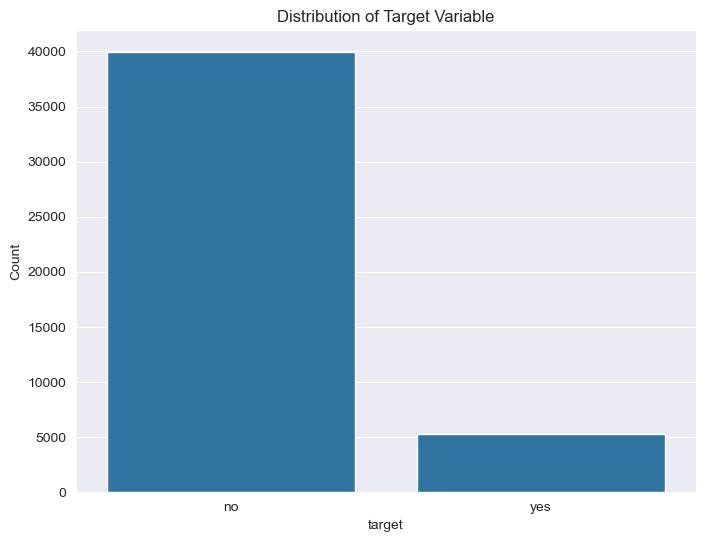

In [12]:
#Distribution plot of target variable
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()


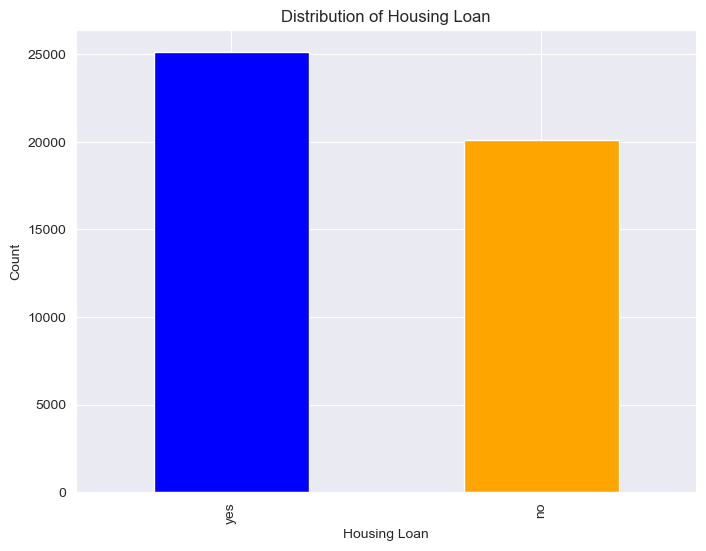

In [13]:
plt.figure(figsize=(8, 6))
data['housing_loan'].value_counts().plot(kind='bar',color=['blue', 'orange'])
plt.title('Distribution of Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

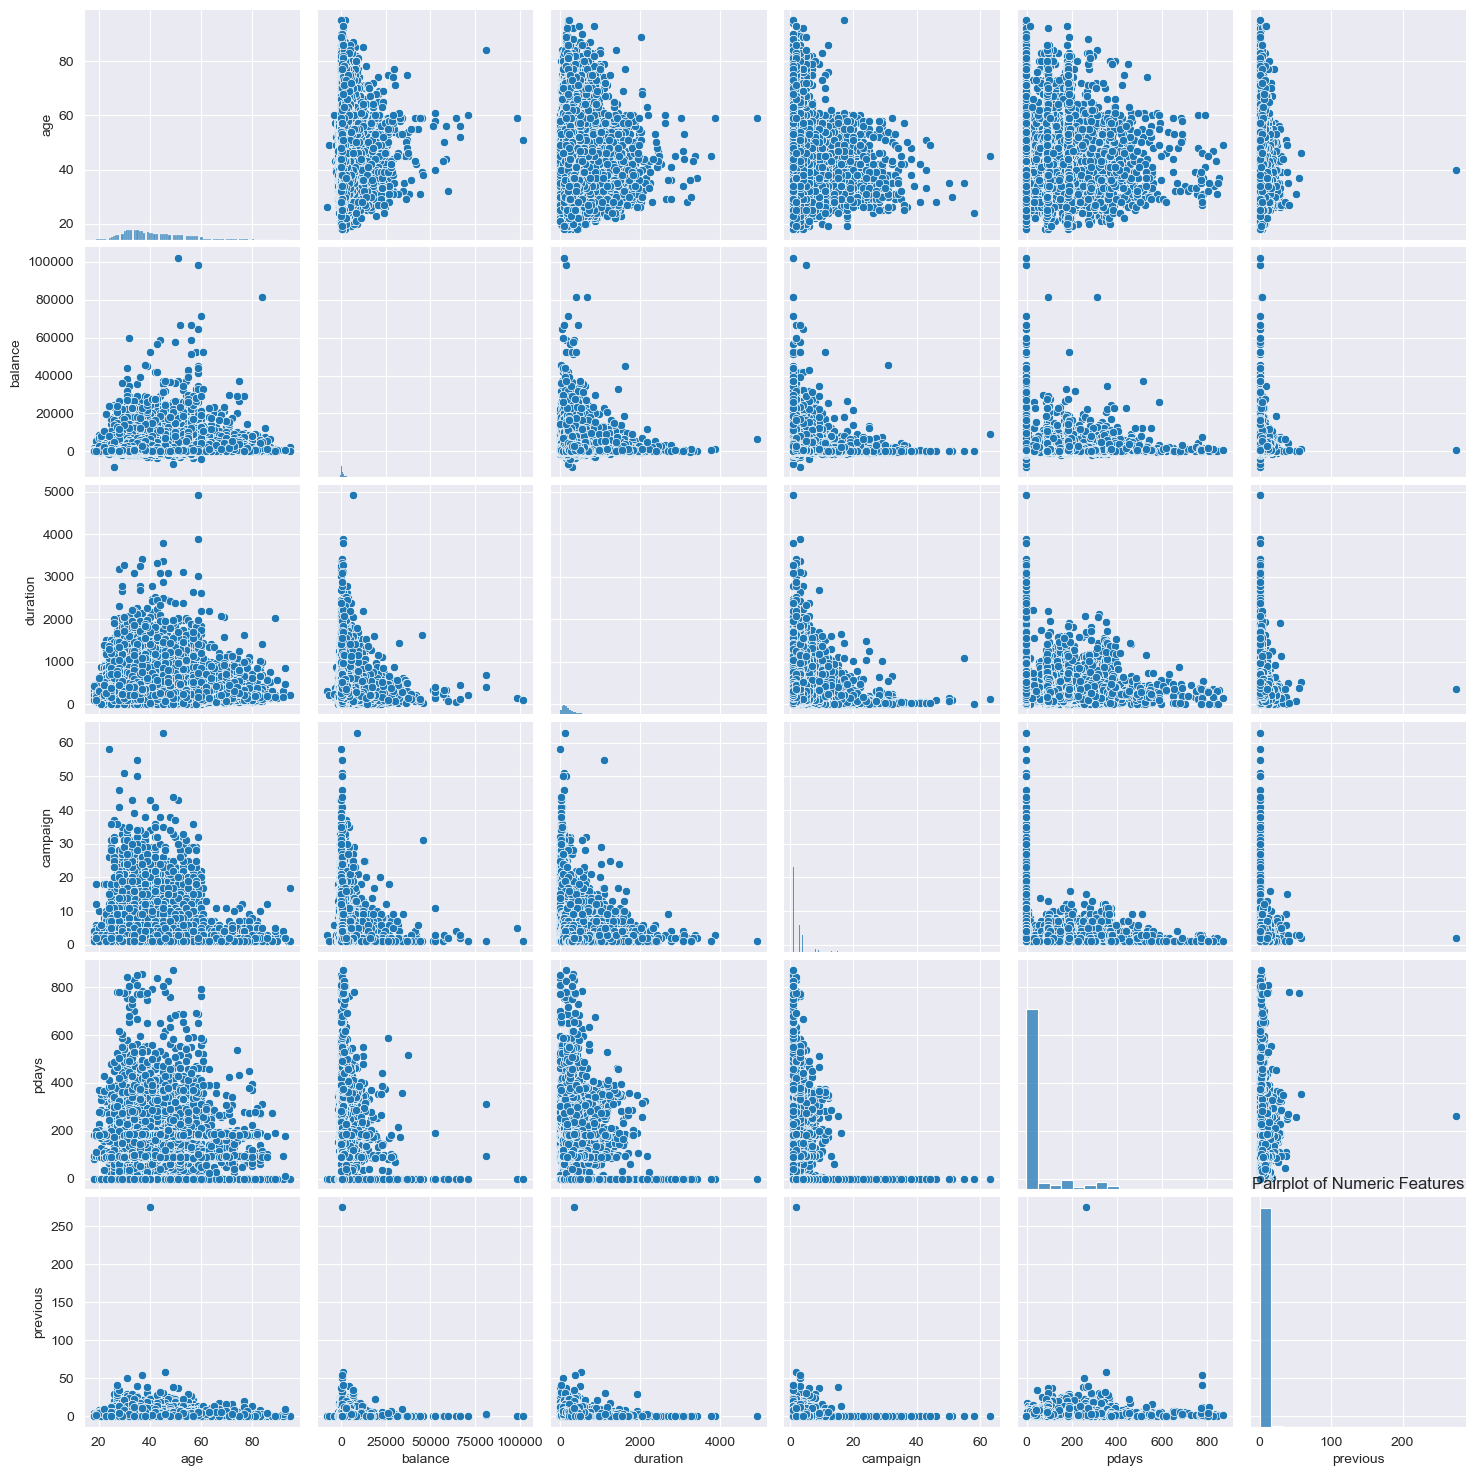

In [14]:
# Distribution plot of numeric features
plt.figure(figsize=(12, 8))
numeric_ft = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
sns.pairplot(numeric_ft)
plt.title('Pairplot of Numeric Features')
plt.show()


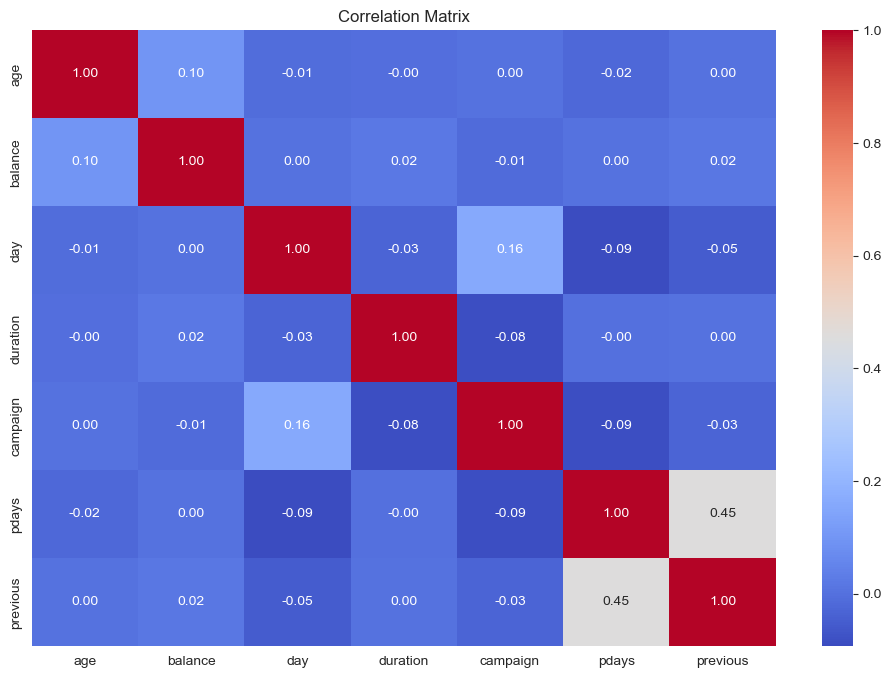

In [15]:
#Correlation matrix for numeric features
plt.figure(figsize=(12, 8))
corr_matrix = numeric_ft.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


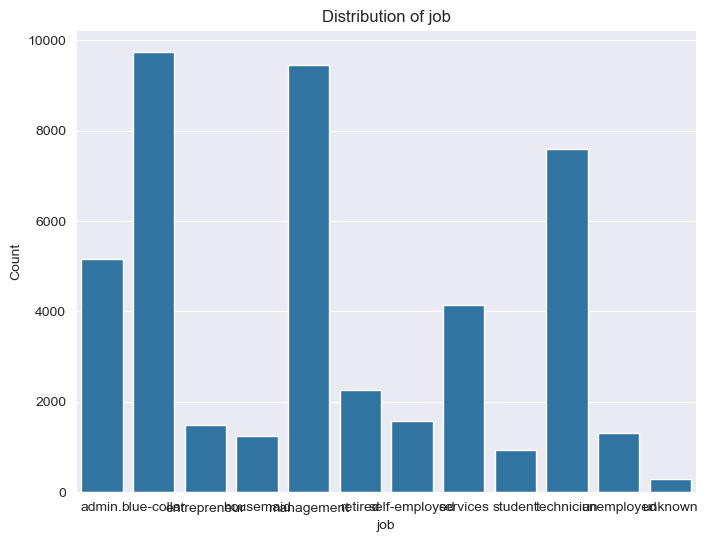

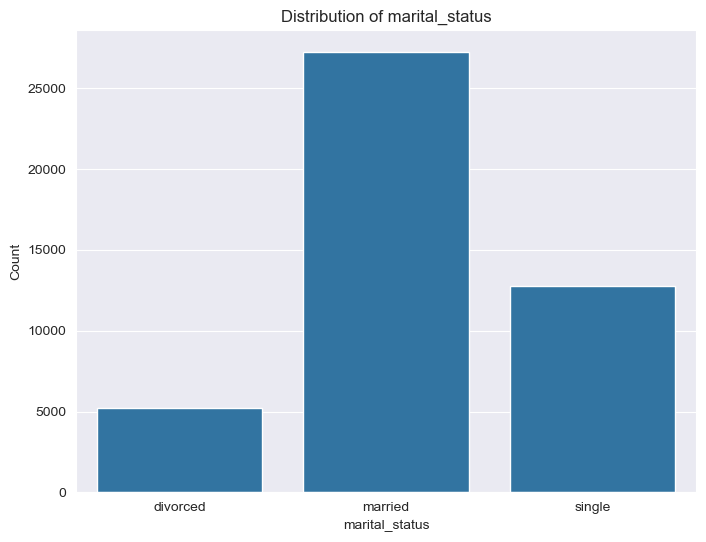

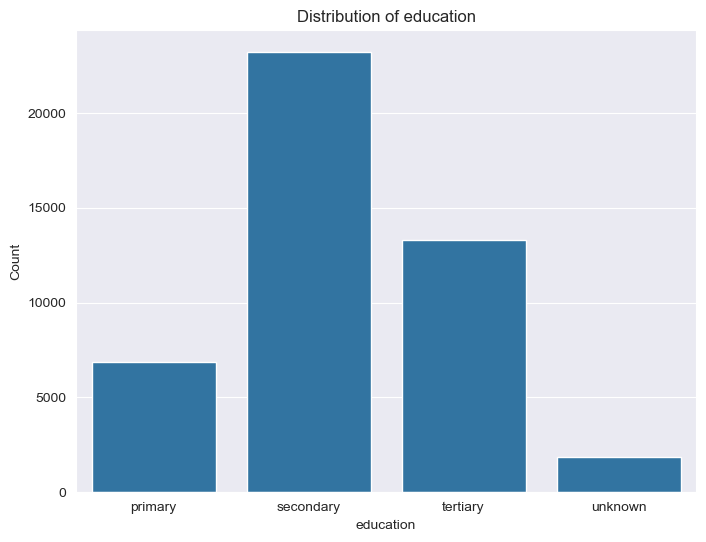

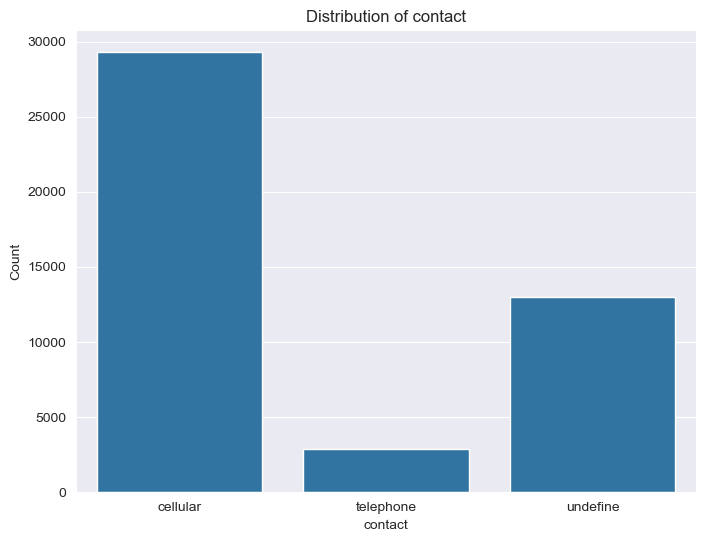

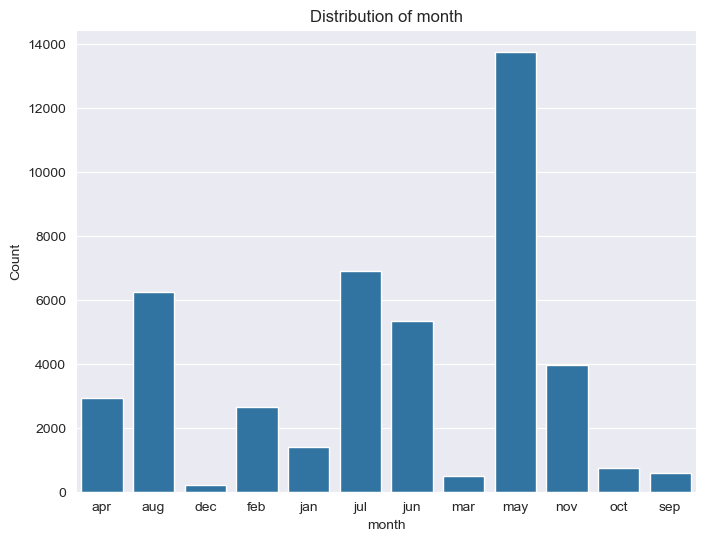

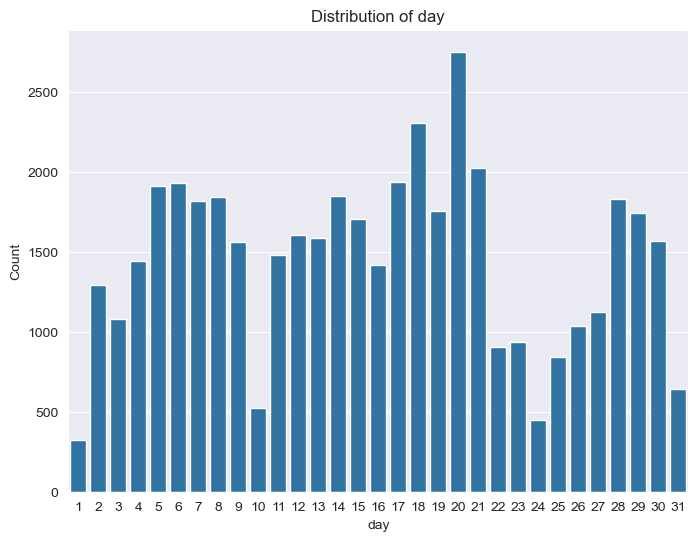

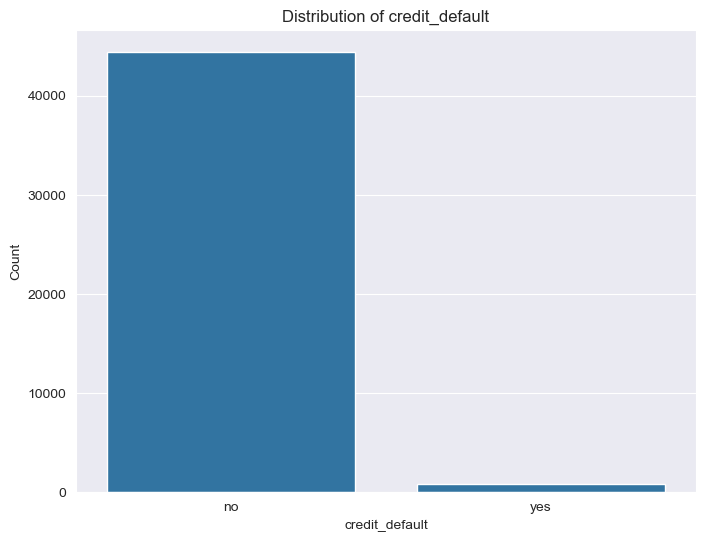

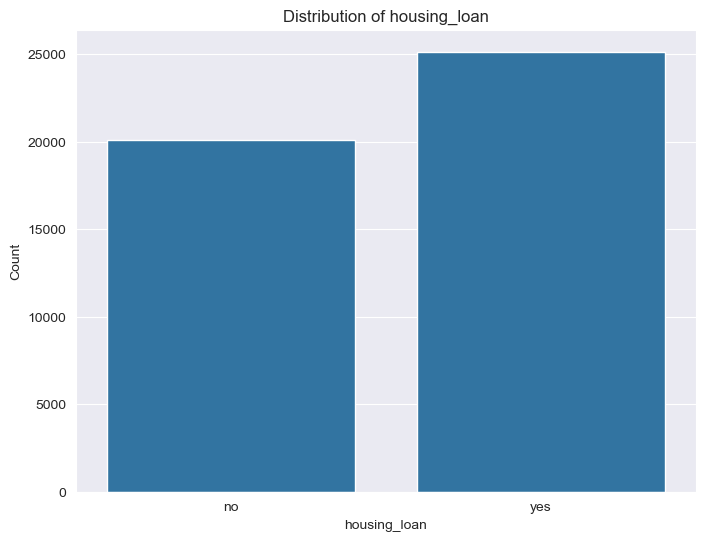

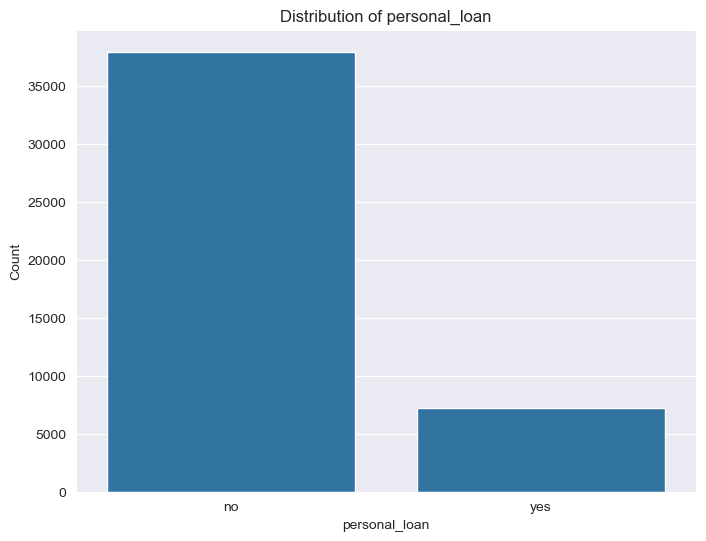

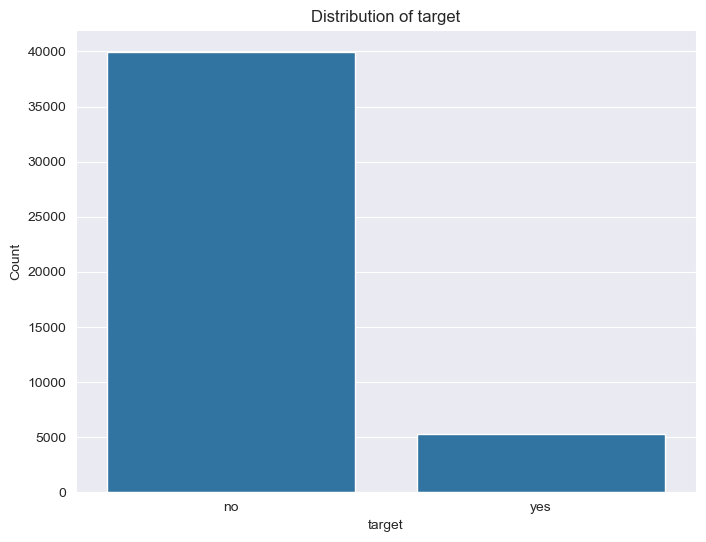

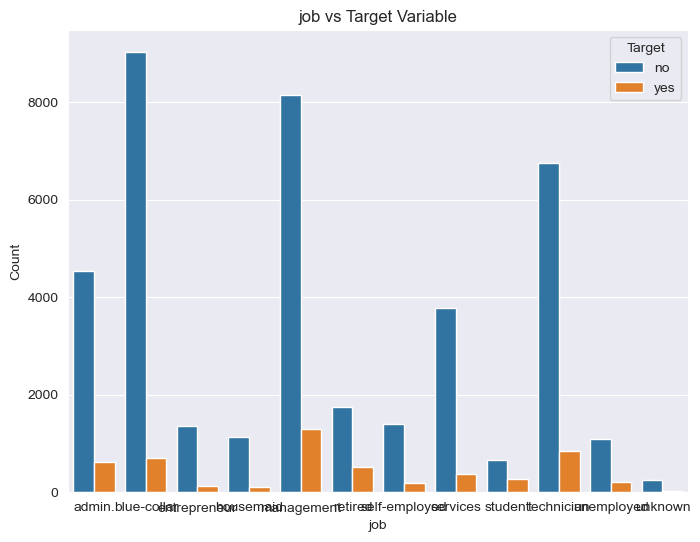

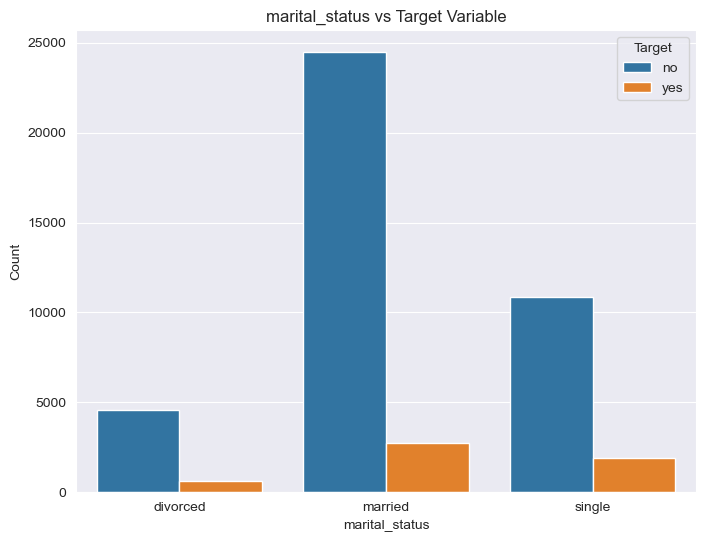

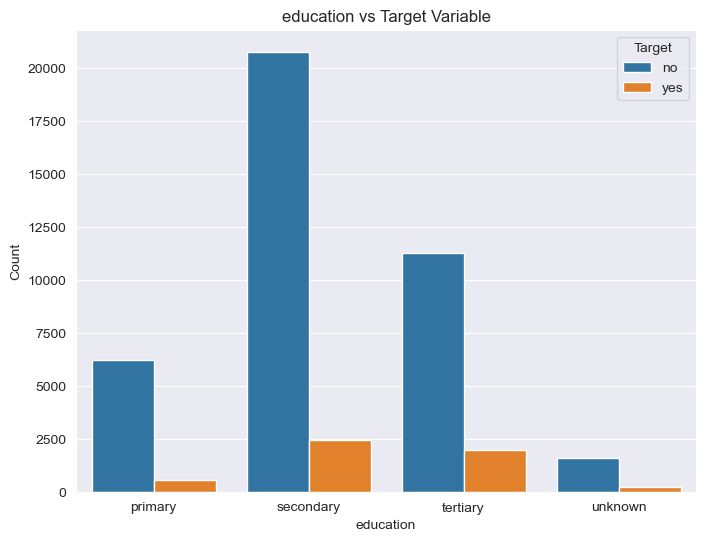

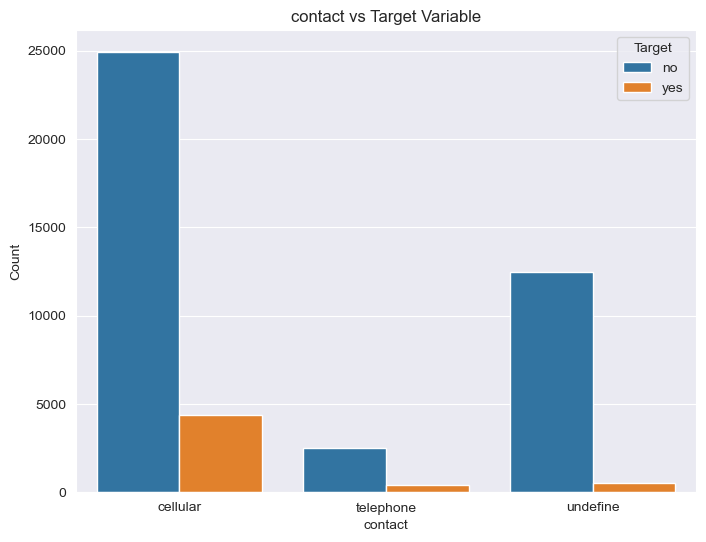

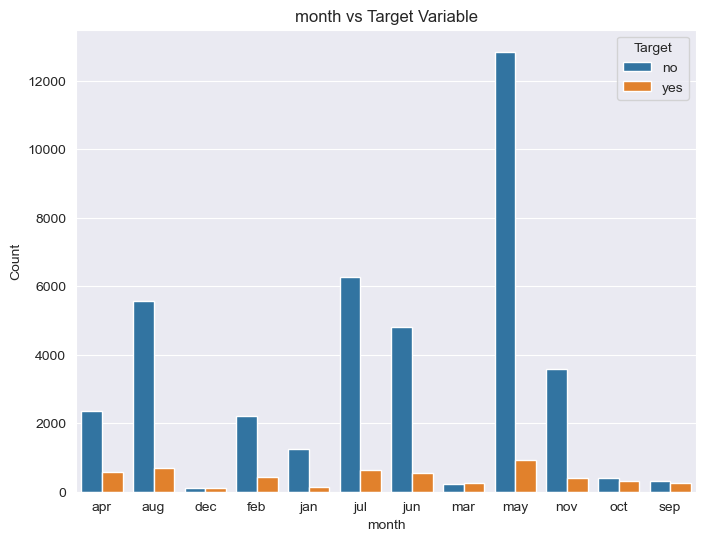

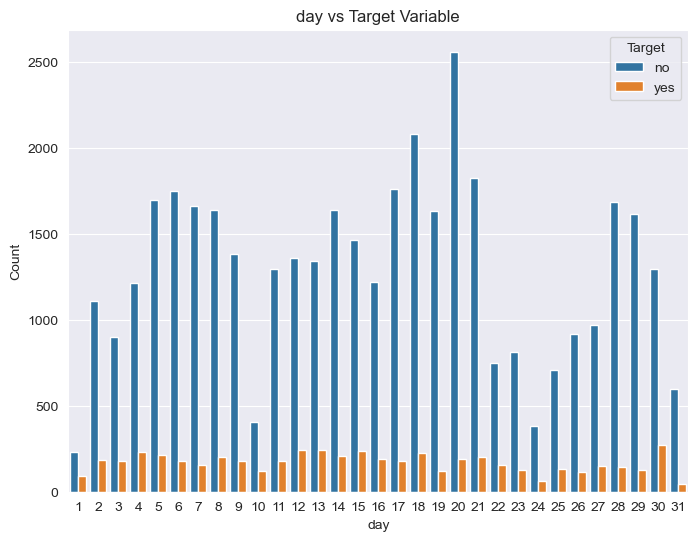

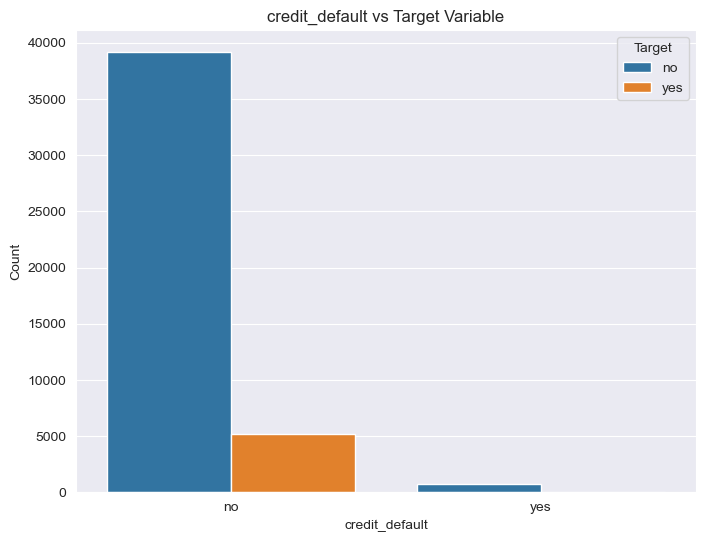

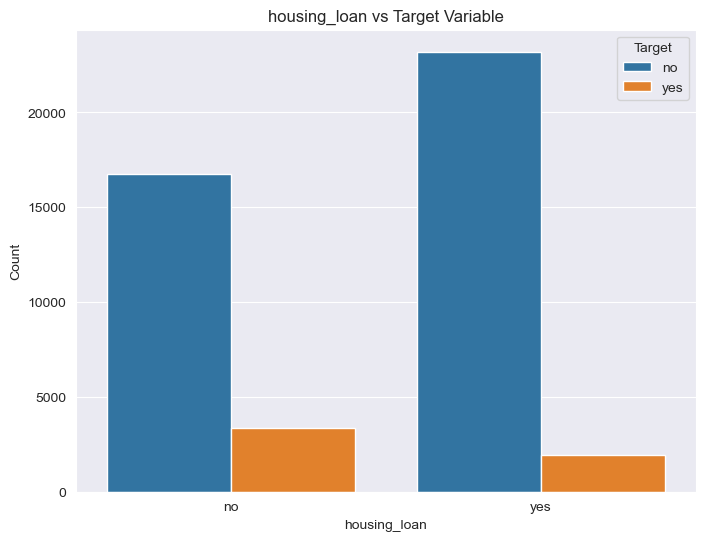

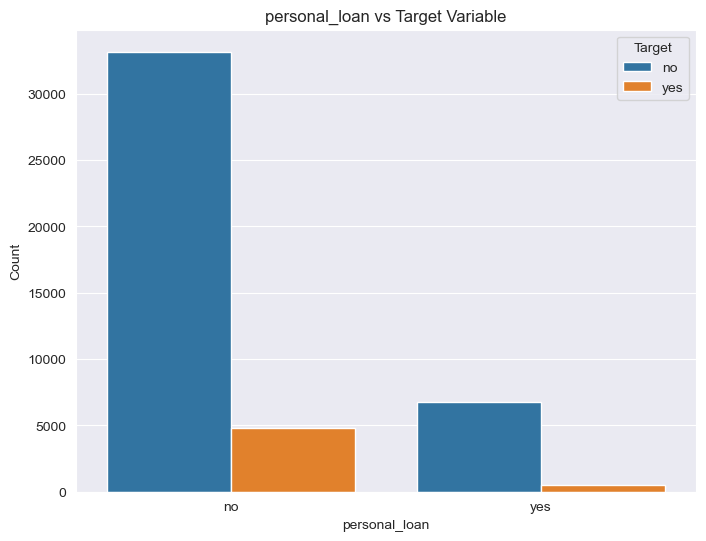

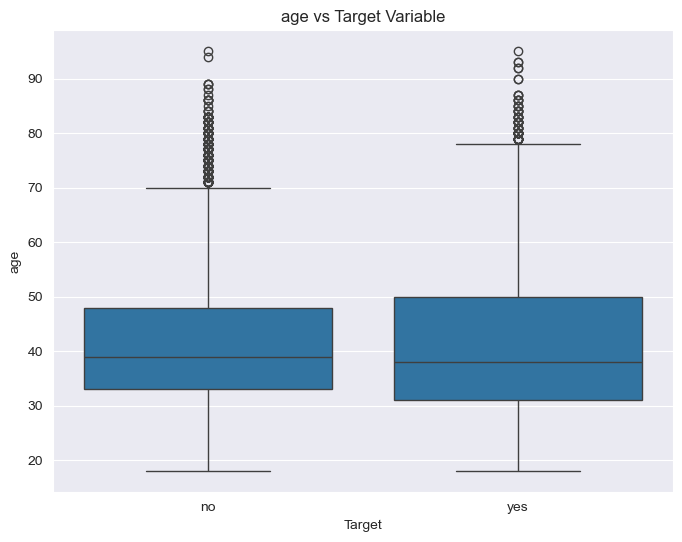

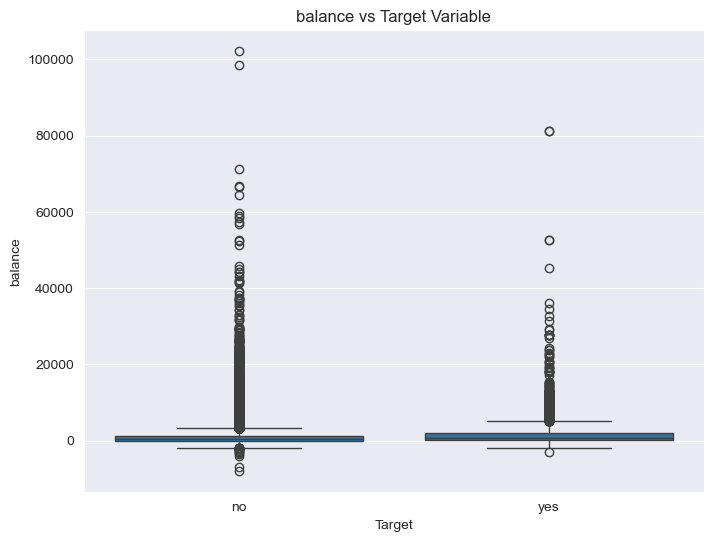

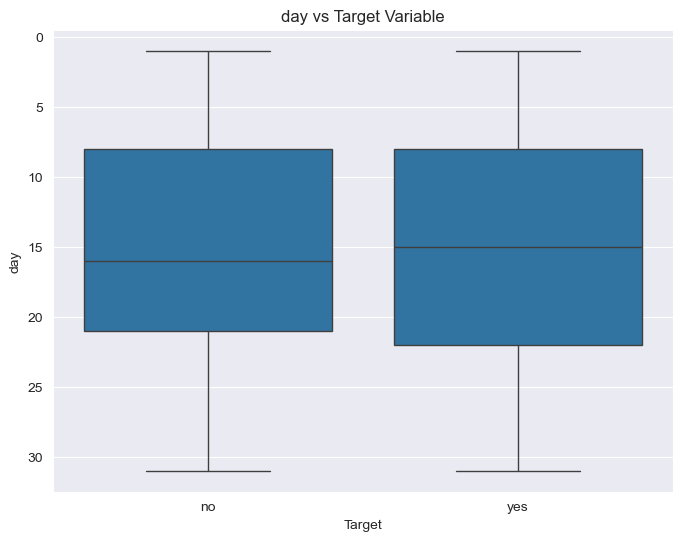

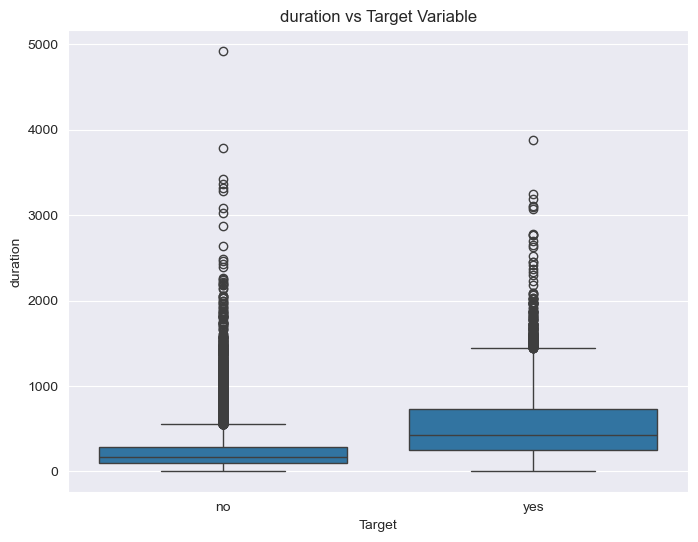

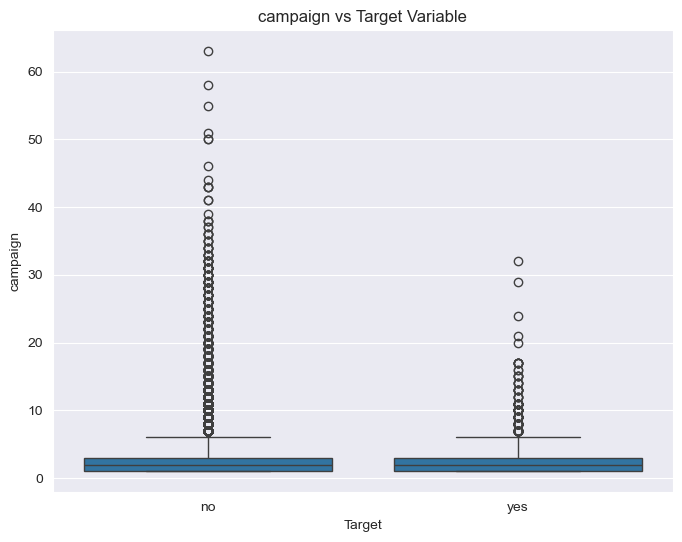

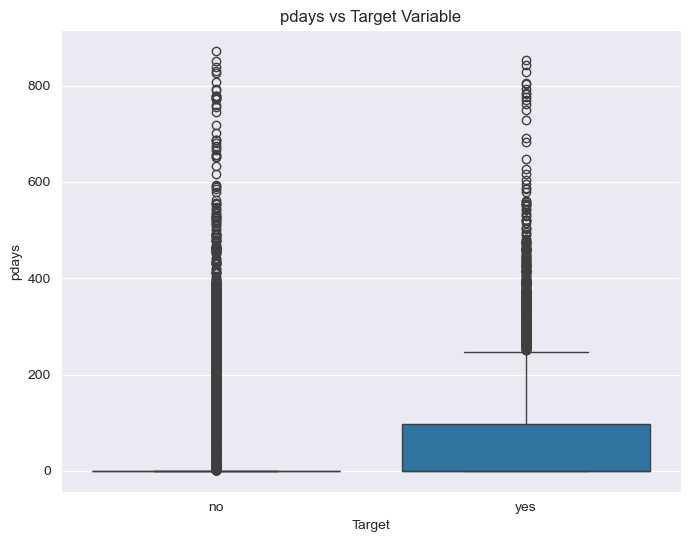

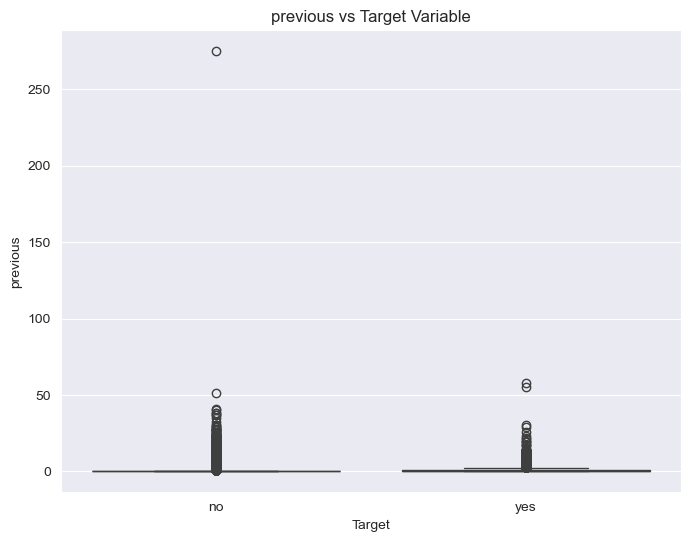

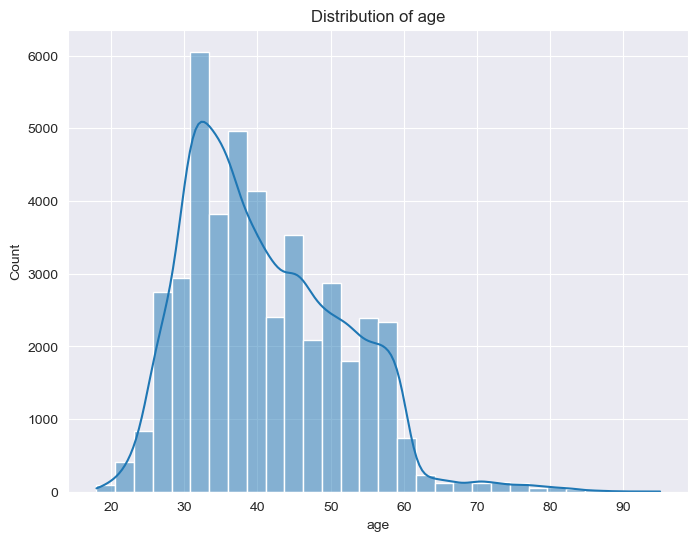

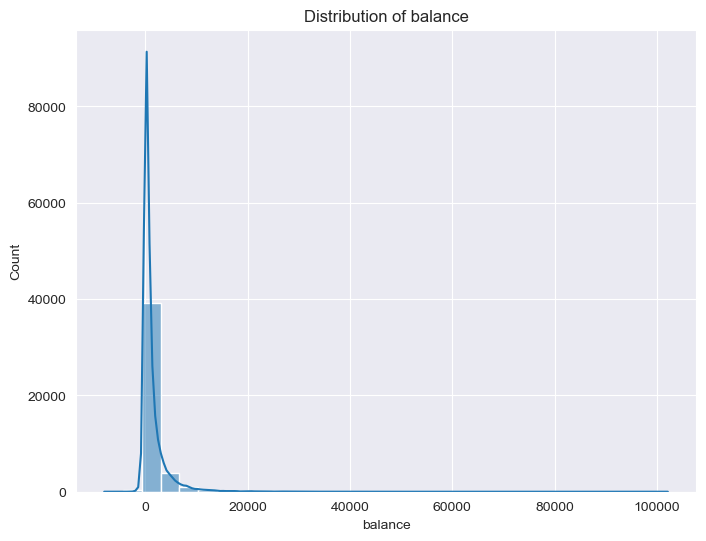

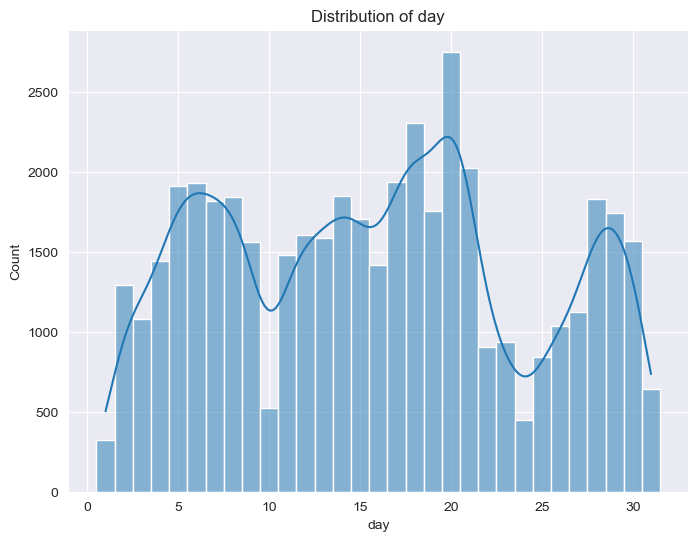

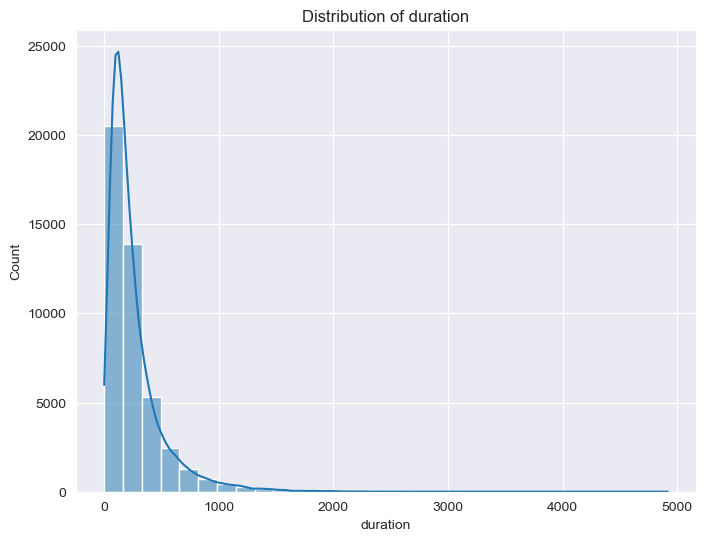

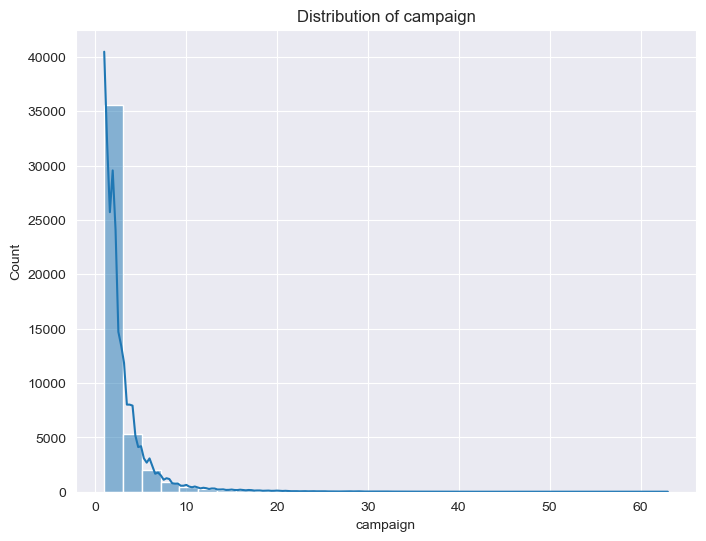

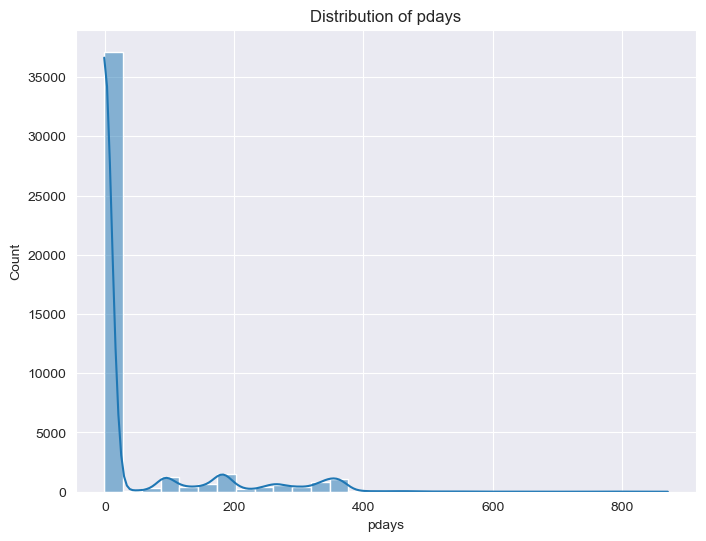

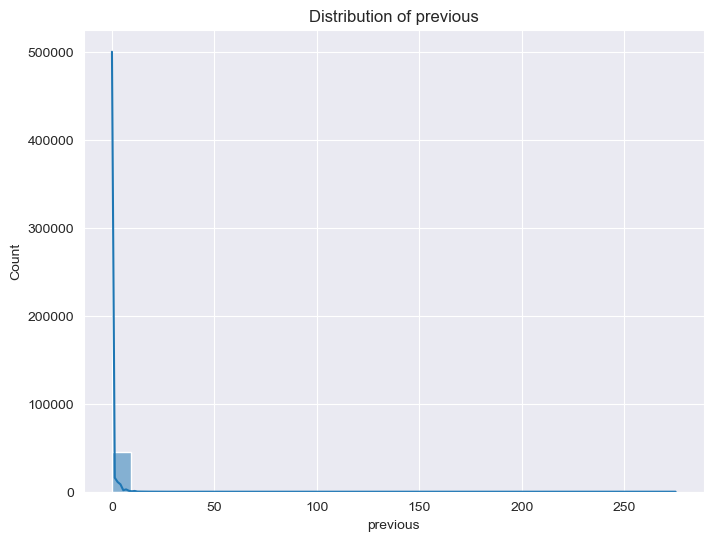

In [16]:
def plot_categorical_distribution(data, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
plot_categorical_distribution(data, 'job')
plot_categorical_distribution(data, 'marital_status')
plot_categorical_distribution(data, 'education')
plot_categorical_distribution(data, 'contact')
plot_categorical_distribution(data, 'month')
plot_categorical_distribution(data, 'day')
plot_categorical_distribution(data, 'credit_default')
plot_categorical_distribution(data, 'housing_loan')
plot_categorical_distribution(data, 'personal_loan')
plot_categorical_distribution(data, 'target')
# Function to plot categorical features against the target variable
def plot_categorical_vs_target(data, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='target', data=data)
    plt.title(f'{column} vs Target Variable')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
    plt.show()
plot_categorical_vs_target(data, 'job')
plot_categorical_vs_target(data, 'marital_status')
plot_categorical_vs_target(data, 'education') 
plot_categorical_vs_target(data, 'contact')
plot_categorical_vs_target(data, 'month')
plot_categorical_vs_target(data, 'day')
plot_categorical_vs_target(data, 'credit_default')
plot_categorical_vs_target(data, 'housing_loan')
plot_categorical_vs_target(data, 'personal_loan')
# Function to plot numeric features against the target variable
def plot_numeric_vs_target(data, column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=column, data=data)
    plt.title(f'{column} vs Target Variable')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()
plot_numeric_vs_target(data, 'age')
plot_numeric_vs_target(data, 'balance')
plot_numeric_vs_target(data, 'day')
plot_numeric_vs_target(data, 'duration')
plot_numeric_vs_target(data, 'campaign')
plot_numeric_vs_target(data, 'pdays')
plot_numeric_vs_target(data, 'previous')
# Function to plot the distribution of numeric features
def plot_numeric_distribution(data, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
plot_numeric_distribution(data, 'age')
plot_numeric_distribution(data, 'balance')
plot_numeric_distribution(data, 'day')
plot_numeric_distribution(data, 'duration')
plot_numeric_distribution(data, 'campaign')
plot_numeric_distribution(data, 'pdays')
plot_numeric_distribution(data, 'previous')


In [17]:
data['housing_loan'].value_counts()

housing_loan
yes    25130
no     20081
Name: count, dtype: int64

In [18]:
X=data.drop(columns=['target'])
y=data['target']
print(X.shape)
print(y.shape)

(45211, 15)
(45211,)


In [19]:
data['target'].value_counts()

target
no     39922
yes     5289
Name: count, dtype: int64

Apply Preprocessing to Data

In [20]:
# Create a pipeline for preprocessing
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital_status', 'education', 'month', 'housing_loan', 'personal_loan','contact','credit_default']
# Create a column transformer to apply different preprocessing steps to different columns
pre_processor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
# Create a pipeline that first applies the preprocessor and then fits a classifier
pre_pipeline = Pipeline(steps=[
    ('preprocessor', pre_processor)
])

In [21]:
#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y,random_state=78)

In [22]:
# Label encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [23]:
print(y_test.shape)
print(y_train.shape)

(9043,)
(36168,)


In [24]:
y_test.view()

array([0, 1, 0, ..., 0, 0, 0], shape=(9043,))

In [25]:
# Fit preprocessing on training data and transform both sets
X_train_tran = pre_pipeline.fit_transform(X_train)
X_test_tran = pre_pipeline.transform(X_test)  # No fitting on test data!

In [26]:
print(X_train_tran.shape)
print(X_test_tran.shape)


(36168, 47)
(9043, 47)


Logic Regression with Scikit-learn training steps

In [29]:
#Instantiate and train
logreg=LogisticRegression()
logreg.fit(X_train_tran,y_train)

LogisticRegression()

Logistic Regression
Accuracy:  0.8926241291606768
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.59      0.26      0.36      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043

Confusion Matrix: 
 [[7797  188]
 [ 783  275]]
ROC AUC Score:  0.8852280918972601


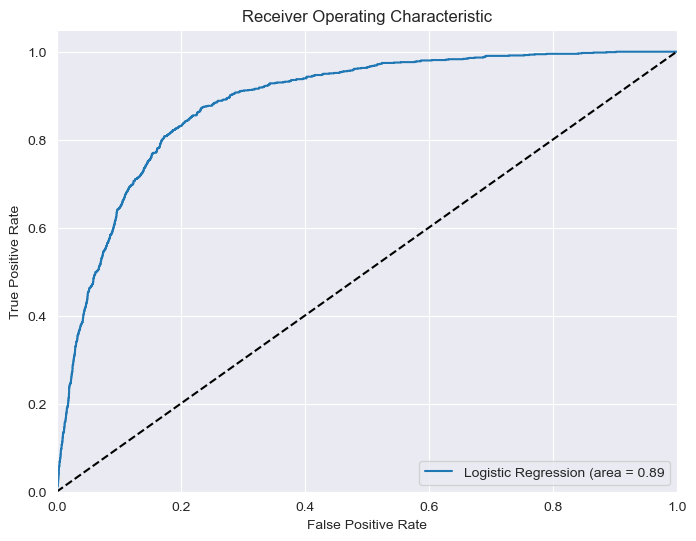

In [30]:
# Predict, Evaluate and plot
y_pred=logreg.predict(X_test_tran)
y_pred_proba=logreg.predict_proba(X_test_tran)[:,1]
print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label= f'Logistic Regression (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()     

Decision Tree with Scikit-learn training steps

Decision Tree Classifier
Accuracy:  0.8713922370894615
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7985
           1       0.45      0.47      0.46      1058

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.69      9043
weighted avg       0.87      0.87      0.87      9043

Confusion Matrix: 
 [[7381  604]
 [ 559  499]]
ROC AUC Score:  0.6980013920240338


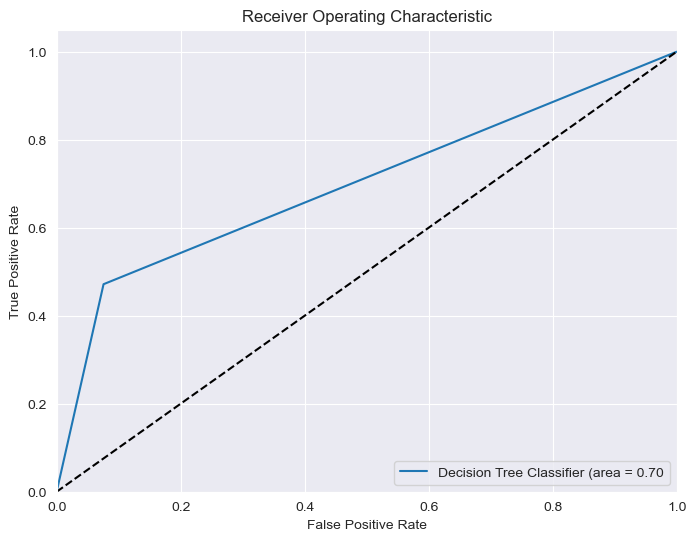

In [31]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train_tran,y_train)
y_pred=dtree.predict(X_test_tran)
y_pred_proba=dtree.predict_proba(X_test_tran)[:,1]
print("Decision Tree Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label= f'Decision Tree Classifier (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Random Forest with Scikit-learn training steps

Random Forest Classifier
Accuracy:  0.8994802609753401
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.63      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043

Confusion Matrix: 
 [[7764  221]
 [ 688  370]]
ROC AUC Score:  0.9230955252819262


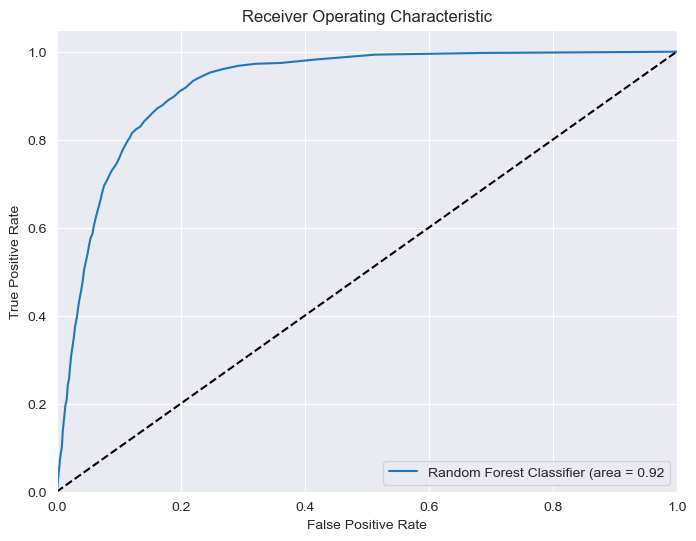

In [32]:
#Random Forest Classifier
rforest=RandomForestClassifier(n_estimators=100)
rforest.fit(X_train_tran,y_train)
y_pred=rforest.predict(X_test_tran)
y_pred_proba=rforest.predict_proba(X_test_tran)[:,1]
print("Random Forest Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label= f'Random Forest Classifier (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Gradient Boosting with Scikit-learn training steps

Gradient Boosting Classifier
Accuracy:  0.8979321021784806
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.61      0.36      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043

Confusion Matrix: 
 [[7743  242]
 [ 681  377]]
ROC AUC Score:  0.9175473152046665


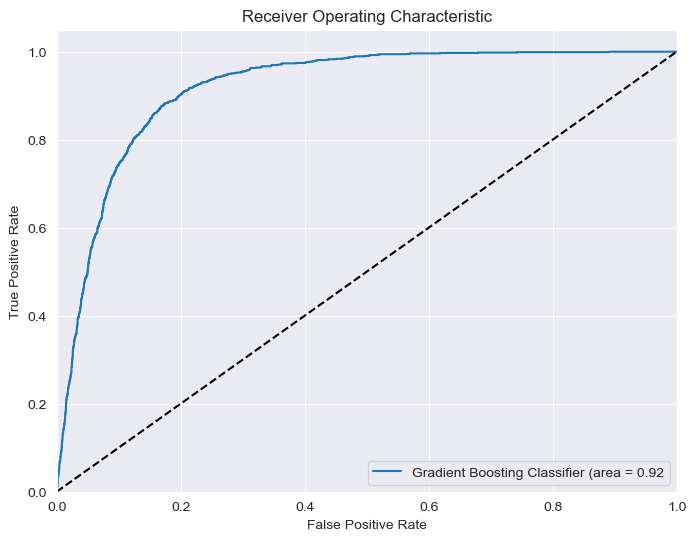

In [33]:
#Gradient Boosting Classifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train_tran,y_train)
y_pred=gbm.predict(X_test_tran)
y_pred_proba=gbm.predict_proba(X_test_tran)[:,1]
print("Gradient Boosting Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label= f'Gradient Boosting Classifier (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

SVC with Scikit-learn training steps

Support Vector Classifier
Accuracy:  0.8971580227800509
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.62      0.31      0.41      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043

Confusion Matrix: 
 [[7790  195]
 [ 735  323]]
ROC AUC Score:  0.8963099526167331


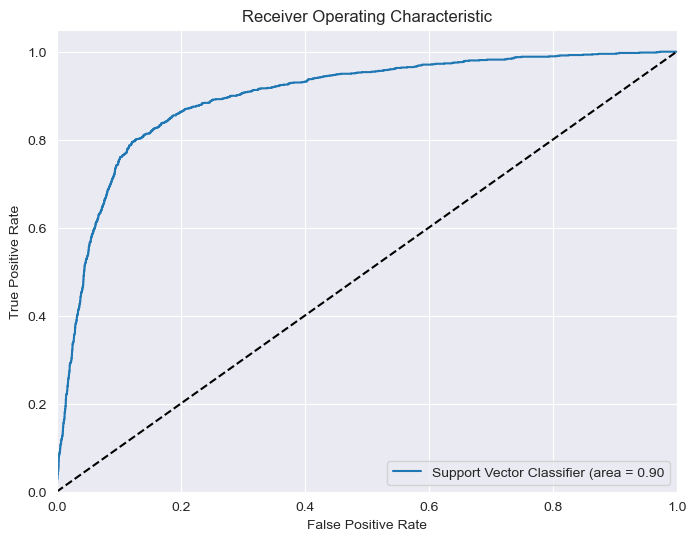

In [34]:
#Support Vector Classifier
svc=SVC(probability=True)
svc.fit(X_train_tran,y_train)
y_pred=svc.predict(X_test_tran)
y_pred_proba=svc.predict_proba(X_test_tran)[:,1]
print("Support Vector Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label= f'Support Vector Classifier (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

GaussianNB with Scikit-learn training steps

Gaussian Naive Bayes
Accuracy:  0.844741789229238
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7985
           1       0.37      0.44      0.40      1058

    accuracy                           0.84      9043
   macro avg       0.64      0.67      0.66      9043
weighted avg       0.86      0.84      0.85      9043

Confusion Matrix: 
 [[7171  814]
 [ 590  468]]
ROC AUC Score:  0.7748649701176473


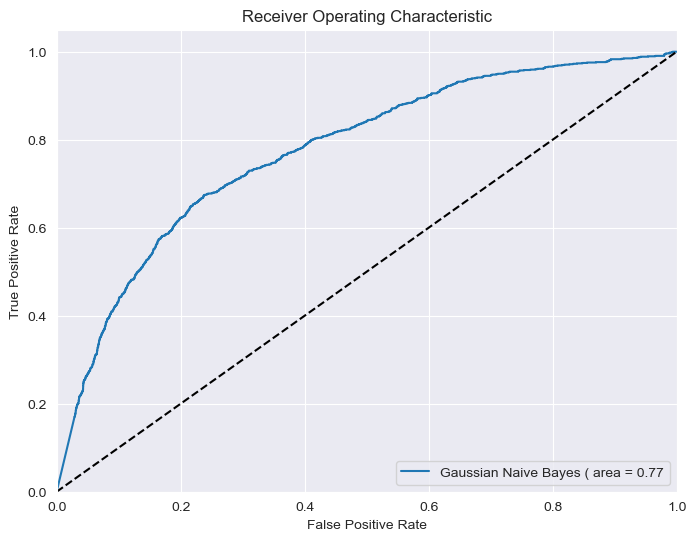

In [35]:
#Gaussian Naive Bayes
gnb=GaussianNB()
gnb.fit(X_train_tran,y_train)
y_pred=gnb.predict(X_test_tran)
y_pred_proba=gnb.predict_proba(X_test_tran)[:,1]
print("Gaussian Naive Bayes")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label= f'Gaussian Naive Bayes ( area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

KNeighbors with Scikit-learn training steps

K Neighbors Classifier
Accuracy:  0.8911865531350216
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.56      0.32      0.41      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.64      0.67      9043
weighted avg       0.87      0.89      0.88      9043

Confusion Matrix: 
 [[7724  261]
 [ 723  335]]
ROC AUC Score:  0.814130227636175


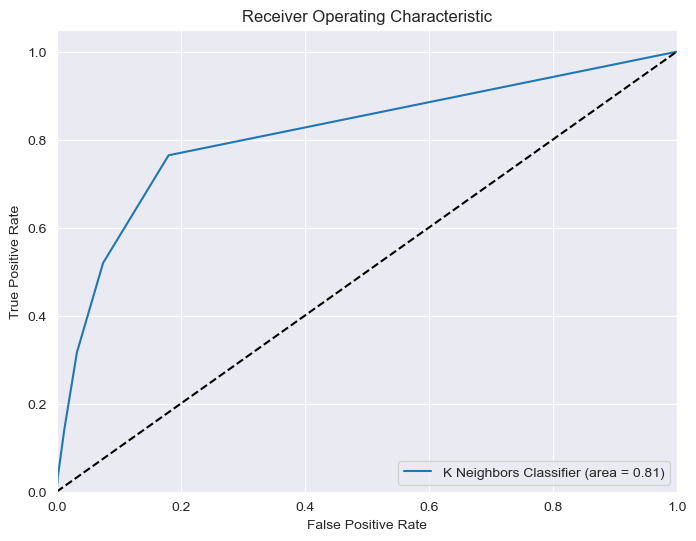

In [36]:
#K Neighbors Classifier
knn=KNeighborsClassifier()
knn.fit(X_train_tran,y_train)
y_pred=knn.predict(X_test_tran)
y_pred_proba=knn.predict_proba(X_test_tran)[:,1]
print("K Neighbors Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='K Neighbors Classifier (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [37]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'Gaussian Naive Bayes', 'K Neighbors'],
    'Accuracy': [accuracy_score(y_test, logreg.predict(X_test_tran)), 
                 accuracy_score(y_test, dtree.predict(X_test_tran)), 
                 accuracy_score(y_test, rforest.predict(X_test_tran)), 
                 accuracy_score(y_test, gbm.predict(X_test_tran)), 
                 accuracy_score(y_test, svc.predict(X_test_tran)), 
                 accuracy_score(y_test, gnb.predict(X_test_tran)), 
                 accuracy_score(y_test, knn.predict(X_test_tran))],
    'ROC_AUC_Score': [roc_auc_score(y_test, logreg.predict_proba(X_test_tran)[:, 1]), 
                      roc_auc_score(y_test, dtree.predict_proba(X_test_tran)[:, 1]), 
                      roc_auc_score(y_test, rforest.predict_proba(X_test_tran)[:, 1]), 
                      roc_auc_score(y_test, gbm.predict_proba(X_test_tran)[:, 1]), 
                      roc_auc_score(y_test, svc.predict_proba(X_test_tran)[:, 1]), 
                      roc_auc_score(y_test, gnb.predict_proba(X_test_tran)[:, 1]), 
                      roc_auc_score(y_test, knn.predict_proba(X_test_tran)[:, 1])]
})

In [38]:
# Sort the results by ROC_AUC_Score in descending order
results = results.sort_values(by='ROC_AUC_Score', ascending=False)
# Display the results
print(results)

                  Model  Accuracy  ROC_AUC_Score
2         Random Forest  0.899480       0.923096
3     Gradient Boosting  0.897932       0.917547
4                   SVC  0.897158       0.896310
0   Logistic Regression  0.892624       0.885228
6           K Neighbors  0.891187       0.814130
5  Gaussian Naive Bayes  0.844742       0.774865
1         Decision Tree  0.871392       0.698001


In [39]:
# Save the model
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(dtree, 'dtree_model.pkl')
joblib.dump(rforest, 'rforest_model.pkl')
joblib.dump(gbm, 'gbm_model.pkl')
joblib.dump(svc, 'svc_model.pkl')
joblib.dump(gnb, 'gnb_model.pkl')
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(pre_pipeline, 'pre_pipeline.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [40]:
# Load the model
logreg = joblib.load('logreg_model.pkl')
dtree = joblib.load('dtree_model.pkl')
rforest = joblib.load('rforest_model.pkl')
gbm = joblib.load('gbm_model.pkl')
svc = joblib.load('svc_model.pkl')
gnb = joblib.load('gnb_model.pkl')
knn = joblib.load('knn_model.pkl')

In [41]:
# Make predictions on new data
new_data = pd.DataFrame({
    'age': [30],
    'balance': [1000],
    'day': [15],
    'duration': [200],
    'campaign': [1],
    'pdays': [999],
    'previous': [0],
    'job': ['admin.'],
    'contact': ['cellular'],
    'marital_status': ['single'],
    'education': ['university.degree'],
    'month': ['may'],
    'housing_loan': ['yes'],
    'personal_loan': ['no'],
    'credit_default': ['no']
})

In [42]:
# Preprocess the new data
new_data = pd.DataFrame(pre_processor.transform(new_data), columns=pre_processor.get_feature_names_out())
# Make predictions
logreg_pred = logreg.predict(new_data)
dtree_pred = dtree.predict(new_data)
rforest_pred = rforest.predict(new_data)
gbm_pred = gbm.predict(new_data)
svc_pred = svc.predict(new_data)
gnb_pred = gnb.predict(new_data)
knn_pred = knn.predict(new_data)
# Print the predictions
print("Logistic Regression Prediction: ", logreg_pred)
print("Decision Tree Prediction: ", dtree_pred)
print("Random Forest Prediction: ", rforest_pred)
print("Gradient Boosting Prediction: ", gbm_pred)
print("SVC Prediction: ", svc_pred)
print("Gaussian Naive Bayes Prediction: ", gnb_pred)
print("K Neighbors Prediction: ", knn_pred)

Logistic Regression Prediction:  [0]
Decision Tree Prediction:  [1]
Random Forest Prediction:  [0]
Gradient Boosting Prediction:  [0]
SVC Prediction:  [0]
Gaussian Naive Bayes Prediction:  [1]
K Neighbors Prediction:  [1]


/home/tisinr/miniforge3/envs/clasfi/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/tisinr/miniforge3/envs/clasfi/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/tisinr/miniforge3/envs/clasfi/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/tisinr/miniforge3/envs/clasfi/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/home/tisinr/miniforge3/envs/clasfi/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without 